#### Note: It's a request to you that I am using python 3.11.5 so if you while evaluating code use same version it will be great o/w you may find some plots different than actual. My friend run my code in python 3.9 he got's issue but when he upgraded to python 3.11.5 then it run fine. Thanks

In [21]:
import numpy as np
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import Axes3D, proj3d

### Defining function f(x1,x2) = -cos(x₁²+x₂²+x₁x₂)

In [22]:
f= lambda x: -np.cos(x[0]**2 + x[1]**2 + x[0]*x[1])

### Plotting z = -cos(x₁²+x₂²+x₁x₂)

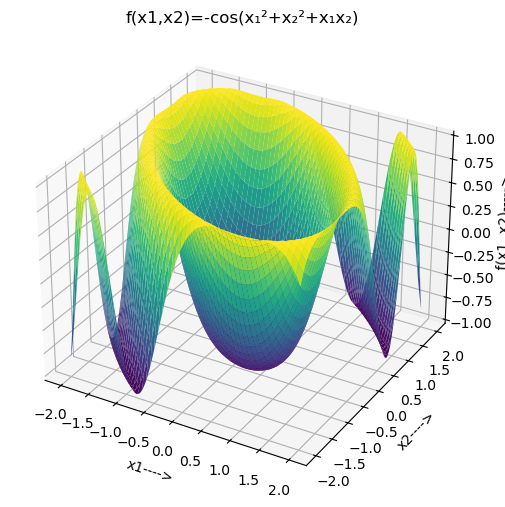

In [23]:
x1=np.linspace(-2,2,5000)
x2=np.linspace(-2,2,5000)
X1,X2= np.meshgrid(x1,x2)
Z=f([X1,X2])
fig = pt.figure(figsize=(6,10))
ax=fig.add_subplot(111,projection='3d') # 111 means grid of 1 row and 1 column and placed at 1st position
# Plot the surface
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')
# fig.colorbar(surf, ax=ax, shrink=0.5)
ax.set_xlabel('x1---->')
ax.set_ylabel('x2---->')
ax.set_zlabel('f(x1, x2)----->')
ax.set_title('f(x1,x2)=-cos(x₁²+x₂²+x₁x₂)' )
pt.show()

### 1. Create a contour plot of f in the range [−2, 2] × [−2, 2] with Python.

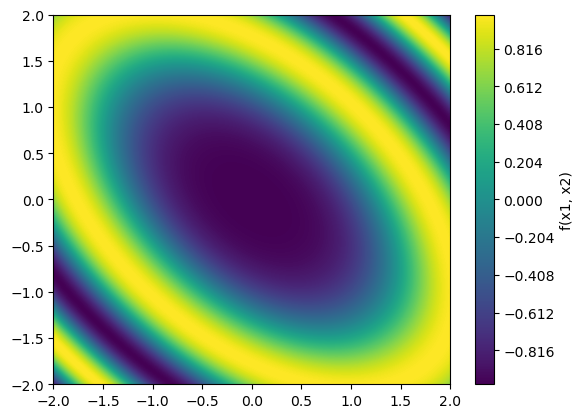

In [24]:
contour=pt.contourf(X1,X2,Z,levels=500,cmap='viridis')#contourf instead of contour so that completely fill contour values in continuous range
pt.colorbar(contour, label='f(x1, x2)')
pt.show()

#### Installing necessary libraries 

In [5]:
!pip install numdifftools

In [6]:
import numdifftools as nd 

#### Computing gradient using library function

In [7]:
grad=nd.Gradient(f)
grad([1,2])

array([2.62794639, 3.28493299])

#### Computing gradient by defining our own function

In [8]:
def gradient_f(x):
    df_dx1 = (2*x[0] + x[1]) * np.sin(x[0]**2 + x[1]**2 + x[0]*x[1])
    df_dx2 = (2*x[1] + x[0]) * np.sin(x[0]**2 + x[1]**2 + x[0]*x[1])
    return np.array([df_dx1, df_dx2])

In [9]:
gradient_f([1,2])

array([2.62794639, 3.28493299])

#### Computing hessian matrix using Hessian function or we can use this logic ∇²f=∇(∇f)

In [10]:
hessian=nd.Hessian(f)
hessian([1,2])

array([[13.37640927, 15.73503169],
       [15.73503169, 20.16152956]])

In [11]:
hess_1=nd.Gradient(grad)
hess_1([1,2])

array([[13.37640927, 15.73503169],
       [15.73503169, 20.16152956]])

#### Computing Hessian Matrix by defining our own function

In [12]:
def hessian_f(x1, x2):
    df2_dx1x1 = np.cos(x1**2+x2**2+x1*x2)*(2*x1+x2)**2 + (2) * np.sin(x1**2 + x2**2 + x1*x2)
    df2_dx1x2 = np.cos(x1**2+x2**2+x1*x2)*(2*x1+x2)*(2*x2+x1) +np.sin(x1**2 + x2**2 + x1*x2)
    df2_dx2x2 = np.cos(x1**2+x2**2+x1*x2)*(2*x2+x1)**2 + (2) * np.sin(x1**2 + x2**2 + x1*x2)
    return np.array([[df2_dx1x1, df2_dx1x2], [df2_dx1x2, df2_dx2x2]])

In [13]:
hessian_f(1,2)

array([[13.37640927, 15.73503169],
       [15.73503169, 20.16152956]])

### Now, we define the restriction of f to Sr={(x₁,x₂)𝛜R² | x₁²+x₂²+x₁x₂<r} with r𝟄R, r>0, i.e. f|Sr:Sr->R,(x1, x2)→ f(x1, x2).

In [14]:
def restricted_function(r):
    f= lambda x: (-np.cos(x[0]**2 + x[1]**2 + x[0]*x[1]))*((x[0]**2+x[1]**2+x[0]*x[1])<r)
    return f

#### Plotting restricted function for r'=π/4

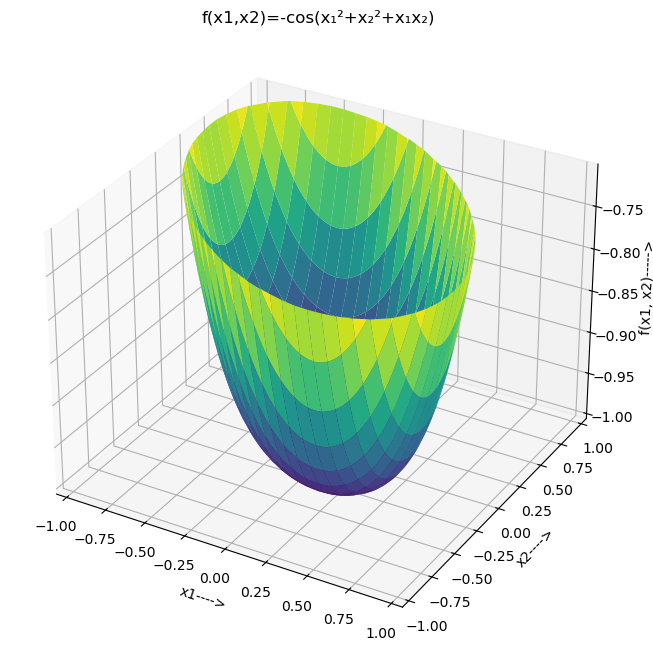

In [15]:
Z=restricted_function(np.pi/4)([X1,X2])
masked_Z = np.ma.masked_where(Z == 0, Z)
non_zero_indices = np.where(Z != 0)
masked_X1 = X1[non_zero_indices]
masked_X2 = X2[non_zero_indices]
Z1=Z[non_zero_indices]
fig = pt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d') # 111 means grid of 1 row and 1 column and placed at 1st position
# Plot the surface
surf = ax.plot_surface(X1, X2, masked_Z, cmap='viridis', edgecolor='none')
# fig.colorbar(surf, ax=ax, shrink=0.5)
ax.set_xlabel('x1---->')
ax.set_ylabel('x2---->')
ax.set_zlabel('f(x1, x2)----->')
ax.set_title('f(x1,x2)=-cos(x₁²+x₂²+x₁x₂)' )
pt.xlim(masked_X1.min(), masked_X1.max())
pt.ylim(masked_X2.min(), masked_X2.max())
pt.show()

### 4. Show that f|Sr with r = π/4 is convex.

#### From the graph only we can show that it is convex
(Mam told us to do it by visualisation only as we can't check on infinite number of points)

### 5. Find the local minimum x* of f|Sr (Identify on the cotour plot)

#### By looking at graph its look like local minimum exist at point (0,0) Let's Verify

In [16]:
min_val=np.min(Z1)
min_val

-0.9999999999999872

#### Finding coordinates where my f|Sr is minimum

In [26]:
min_Z_idx = np.argmin(Z1)
min_Z_value = Z1[min_Z_idx]
min_Z_index = np.unravel_index(min_Z_idx, Z1.shape)
x1_min=masked_X1[min_Z_index]
x2_min=masked_X2[min_Z_index]
x1_min,x2_min

(0.0004000800160031126, -0.0004000800160031126)

##### Hence we can say that local minima exist at (0,0)

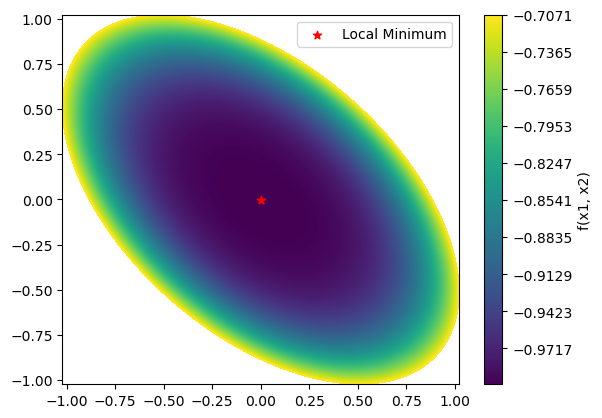

In [29]:
contour=pt.contourf(X1,X2,masked_Z,levels=1000,cmap='viridis')
pt.scatter(x1_min,x2_min,color='red',marker='*',label='Local Minimum')
pt.colorbar(contour, label='f(x1, x2)')
pt.xlim(masked_X1.min(), masked_X1.max())
pt.ylim(masked_X2.min(), masked_X2.max())
pt.legend()
pt.show()

#### 6. Is x* a global minimum of f?

### Yes
Because since f|Sr is a convex function and X* is a local minimum hence it is also Global Minimum

Also we can see that min value is -1 and range of cos function is [-1,1] hence it is also a global minimum